# CHILDES Analysis: Analyzing  the Distribution on Light/Heavy Verbs 

## Background Information: CHILDES Analysis of Light and Heavy Verbs 

## Introduction:

Driven by the data collected from the Brown Corpus under [CHILDES](http://childes.talkbank.org/), the following code displays the distribution of syntactic objects as predicates to verbs that can be both light and heavy.

[**Light Verbs**](https://en.wikipedia.org/wiki/Light_verb): In Linguistics, light verbs are verbs that hold little semantic meaning and hold weak relations to their predicates. They typically precede predicates that depict an event. `Ex. He gave a hug.`

[**Heavy Verbs**](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3867984/): Heavy verbs are verbs that have objects follow after them, having stronger associations with specific predicates. `Ex. He kicked a ball.` 

### Methodology
In the process of collecting the data, the verbs: _'do', 'get', 'give', 'have', 'make',_ and _'take'_ were chosen as samples of light/heavy verbs. To account for sentences that have inflections of those verbs, we filtered through each sentence in the corpus for ones that contained their lemmas. We then had annotators double code through the data to identify the syntactic objects of each sentence, using _'event', 'object', 'pronoun'_ as labels. Once fully annotated, we converged the labels that two annotators had done to ensure that each sentence had the correct label. With this, we were able to obtain a data set that represented a sample of the frequency of the use of light/heavy verbs in children speech. 

### Analysis
For the sake of this particular analysis, I have chosen to focus on the frequency of use of the verbs in the light and heavy sense, over the development of each participant. In future work, the columns _'Age'_ and _'Convergence'_ will be under analysis to find insights into the acquisition of light/heavy verbs over the course of their development.


***
## Retrieving and cleaning the data set for analysis

In [1]:
import pandas as pd
from IPython.display import display

# Read in the csv file of each verb
do_csv = pd.read_csv("Brown_do_Revision.csv")
get_csv = pd.read_csv("Brown_get_Revision.csv")
give_csv = pd.read_csv("Brown_give_Revision.csv")
have_csv = pd.read_csv("Brown_have_Revision.csv")
make_csv = pd.read_csv("Brown_make_Revision.csv")
take_csv = pd.read_csv("Brown_take_Revision.csv")

** Pre-normalizing **

In [2]:
# Retrieve & store columns under analysis 
do_csv = do_csv.loc[:,["Name", "Age", "Sent", "Convergence"]]
get_csv = get_csv.loc[:,["Name", "Age", "Sent", "Convergence"]]
give_csv = give_csv.loc[:,["Name", "Age", "Sent", "Convergence"]]
have_csv = have_csv.loc[:,["Name", "Age", "Sent", "Convergence"]]
make_csv = make_csv.loc[:,["Name", "Age", "Sent", "Convergence"]]
take_csv = take_csv.loc[:,["Name", "Age", "Sent", "Convergence"]]

display(do_csv[500:505])

,Name,Age,Sent,Convergence
500,['Adam'],['P5Y2M12D'],are you sure it doesn't write,0
501,['Adam'],['P5Y2M12D'],what're you doing Mommy,0
502,['Adam'],['P5Y2M12D'],I didn't ask her nothing else but one more,0
503,['Adam'],['P5Y2M12D'],Mommy doesn't know it's gonna say cafe,0
504,['Adam'],['P5Y2M12D'],if it doesn't hit it it's good,0


**Post-normalizing**

In [3]:
# Normalize Name and Age columns
do_csv['Name'] = do_csv.Name.apply(lambda x: str(x)[2:len(str(x))-2])
get_csv['Name'] = get_csv.Name.apply(lambda x: str(x)[2:len(str(x))-2])
give_csv['Name'] = give_csv.Name.apply(lambda x: str(x)[2:len(str(x))-2])
have_csv['Name'] = have_csv.Name.apply(lambda x: str(x)[2:len(str(x))-2])
make_csv['Name'] = make_csv.Name.apply(lambda x: str(x)[2:len(str(x))-2])
take_csv['Name'] = take_csv.Name.apply(lambda x: str(x)[2:len(str(x))-2])

do_csv['Age'] = do_csv.Age.apply(lambda x: str(x)[3:7])
get_csv['Age'] = get_csv.Age.apply(lambda x: str(x)[3:7])
give_csv['Age'] = give_csv.Age.apply(lambda x: str(x)[3:7])
have_csv['Age'] = have_csv.Age.apply(lambda x: str(x)[3:7])
make_csv['Age'] = make_csv.Age.apply(lambda x: str(x)[3:7])
take_csv['Age'] = take_csv.Age.apply(lambda x: str(x)[3:7])

display(do_csv[500:505])

,Name,Age,Sent,Convergence
500,Adam,5Y2M,are you sure it doesn't write,0
501,Adam,5Y2M,what're you doing Mommy,0
502,Adam,5Y2M,I didn't ask her nothing else but one more,0
503,Adam,5Y2M,Mommy doesn't know it's gonna say cafe,0
504,Adam,5Y2M,if it doesn't hit it it's good,0


By normalizing the values within the _'Name'_ and _'Age'_ columns, we're able access the data more efficently. For _'Age'_ in particular, we are able to look at the the year and month a sentence was uttered. This in part would aid us further down the road in looking at trends over the development of each participant, measuring the frequency of the use of light/heavy versions of each verb each year.

In [4]:
# Group unique cell values under the column 'Convergence' for each verb
do_groups = do_csv.groupby("Convergence")
get_groups = get_csv.groupby("Convergence")
give_groups = give_csv.groupby("Convergence")
have_groups = have_csv.groupby("Convergence")
make_groups = make_csv.groupby("Convergence")
take_groups = take_csv.groupby("Convergence")

do_groups.size()

Convergence
!!!          28
0          1244
event        65
object      113
pronoun     713
dtype: int64

In grouping the values under the column _'Convergence'_ we're able to view the frequency of each label for a particular verb. As seen above, there are five labels that were used to categorize the data. 

* '!!!' represents sentences that were ambiguous
* '0' represents those that weren't applicable to our analysis
* 'event' represents a type of event occuring `Ex. giving a kiss`
* 'object' represents predicates that have physical objects within them `Ex. gave a book`
* 'pronoun' represents predicates that contained a pronoun `Ex. did that go to bed`

*As a side note, sentences that had 'it' as their syntactic object were also labeled '0'. 

In [5]:
# Retrieve and store the frequencies of the values under analysis [event,object,pronoun]
do_values = list(do_groups["Convergence"].size().drop(['0','!!!']))
get_values = list(get_groups["Convergence"].size().drop(['0','!!!']))
give_values = list(give_groups["Convergence"].size().drop(['0','!!!']))
have_values = list(have_groups["Convergence"].size().drop(['0','!!!']))
make_values = list(make_groups["Convergence"].size().drop(['0','!!!']))
take_values = list(take_groups["Convergence"].size().drop(['0','!!!']))

do_values

[65, 113, 713]

In [6]:
# Retrieve the keys needed for analysis
keys = list(do_groups["Convergence"].groups.keys())
display(keys)
del keys[0:2]
keys

['!!!', '0', 'event', 'object', 'pronoun']

['event', 'object', 'pronoun']

As previously stated, for the sake of this analysis, we have decided to look at the sentences that were labeled with _'event', 'object'_ and  _'pronoun'_. 

***
## Plotting the distribution of light and heavy verbs in child directed speech

# Question: What is the distribution of 'Syntactic Objects' for each verb?

In [7]:
# Displays the percentage and count of each label
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct
# Original source is provided in the Reference section

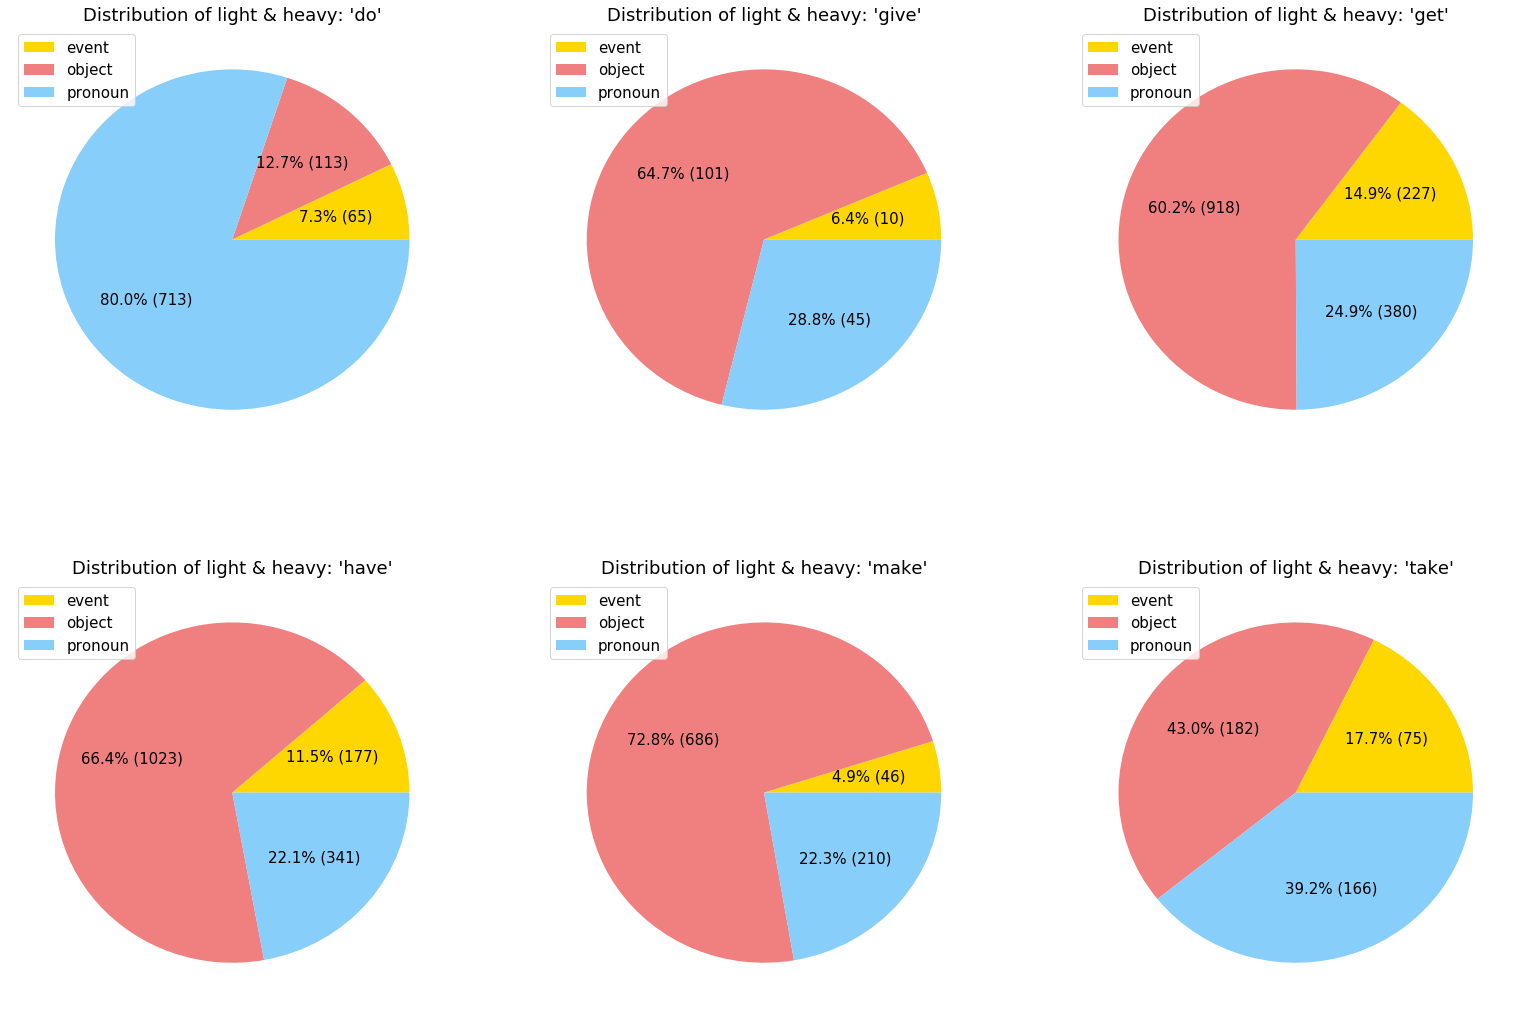

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['font.size'] = 15 # Adjust fontsize of the percentages/counts

fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(27,18))
ax1, ax2, ax3, ax4, ax5, ax6 = fig.axes

verbs = ['do', 'give', 'get', 'have', 'make', 'take']
colors = ['gold', 'lightcoral', 'lightskyblue']

# Plot the values of each verb
ax1.pie(do_values, colors=colors, autopct=make_autopct(do_values))
ax2.pie(give_values, colors=colors, autopct=make_autopct(give_values))
ax3.pie(get_values, colors=colors, autopct=make_autopct(get_values))
ax4.pie(have_values, colors=colors, autopct=make_autopct(have_values))
ax5.pie(make_values, colors=colors, autopct=make_autopct(make_values))
ax6.pie(take_values, colors=colors, autopct=make_autopct(take_values))

# Adjusts graphs' aesthetics
for ax, verb in zip(fig.axes, verbs):
    ax.set_title("Distribution of light & heavy: '" + verb + "'", fontsize=18)
    ax.legend(keys, fontsize=15, loc=2)

plt.subplots_adjust(hspace= .3) # Adjust spacing between plots
plt.show()

## References

* **Definition of Light Verbs**: https://en.wikipedia.org/wiki/Light_verb
* **Object Associations of Early-Learnt Light/Heavy Verbs**: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3867984/
* **How to use matplotlib autopct**: https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct